# Online Travel Agency

### The dataset is from an online travel agency that tracks their users’ browsing history from search to bookings and payments.

## Importing required Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, datetime
import gzip
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# getting excel formate data

da=pd.read_excel('data-dist.xlsx')

#this data contains description of all columns

In [3]:
da

,ID,Column Name,Data Type,Description
0,1,search_id,Integer,The ID of the search
1,2,timestamp,Date/time,Date and time of the search
2,3,site_id,Integer,"ID of the website point of sale (i.e..com, .co..."
3,4,user_country_id,Integer,The ID of the country the customer is located
4,5,user_hist_stars,Float,The mean star rating of hotels the customer ha...
5,6,user_hist_paid,Float,The mean price per night (in US$) of the hotel...
6,7,listing_country_id,Integer,The ID of the country the hotel is located in
7,8,listing_id,Integer,The ID of the hotel
8,9,listing_stars,Integer,"The star rating of the hotel, from 1 to 5, in ..."
9,10,listing_review_score,Float,The mean customer review score for the hotel o...


In [4]:
# getting csv formate data

data=pd.read_csv('train_small.csv')

In [5]:
#shape of the data which tells about no.of rows and columns

data.shape

(2380557, 54)

In [6]:
#head of the dataset which shows first 5 rows of dataset

data.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [7]:
#to display all the columns

data.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id', 'user_hist_stars', 'user_hist_paid', 'listing_country_id', 'listing_id', 'listing_stars', 'listing_review_score', 'is_brand', 'location_score1', 'location_score2', 'log_historical_price', 'listing_position', 'price_usd', 'has_promotion', 'destination_id', 'length_of_stay', 'booking_window', 'num_adults', 'num_kids', 'num_rooms', 'stay_on_saturday', 'log_click_proportion', 'distance_to_dest', 'random_sort', 'competitor1_rate', 'competitor1_has_availability', 'competitor1_price_percent_diff', 'competitor2_rate', 'competitor2_has_availability', 'competitor2_price_percent_diff', 'competitor3_rate', 'competitor3_has_availability', 'competitor3_price_percent_diff', 'competitor4_rate', 'competitor4_has_availability', 'competitor4_price_percent_diff', 'competitor5_rate', 'competitor5_has_availability', 'competitor5_price_percent_diff', 'competitor6_rate', 'competitor6_has_availability', 'competitor6_price_percent_diff',
       'com

In [9]:
#finding null values, each column gives out total number of null values of that column

data.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [10]:
#getting the unique values in a column, total number of unique values in a column

data.nunique()

search_id                          95842
timestamp                          95578
site_id                               34
user_country_id                      192
user_hist_stars                      292
user_hist_paid                      4345
listing_country_id                   166
listing_id                        117378
listing_stars                          6
listing_review_score                  10
is_brand                               2
location_score1                      337
location_score2                     9082
log_historical_price                 381
listing_position                      40
price_usd                          62712
has_promotion                          2
destination_id                     13122
length_of_stay                        33
booking_window                       392
num_adults                             9
num_kids                              10
num_rooms                              8
stay_on_saturday                       2
log_click_propor

In [11]:
#getting information about each column which gives null value, count and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [12]:
#used to view some basic statistical details like percentile, mean, std and so on

data.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,2.380557e+06,1.854565e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,152107.000000,1.610221e+06,2.380557e+06,59010.000000,63662.000000,46401.000000,965758.000000,1.016116e+06,2.639700e+05,731551.000000,788086.000000,225486.000000,148194.000000,165281.000000,6.286100e+04,1.065082e+06,1.131440e+06,401164.000000,119637.000000,129892.000000,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,2.878558e+00,1.310325e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-24.398076,1.315759e+03,2.967369e-01,0.484138,0.027740,237.746471,0.043637,3.933803e-02,2.346923e+01,0.016820,0.058079,26.303225,-0.016074,0.096393,1.545803e+02,2.273252e-02,5.156084e-02,29.110785,0.130169,0.076156,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,1.536947e+00,1.605939e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,16.129689,2.029315e+03,4.568196e-01,0.642136,0.221842,1134.932987,0.447474,2.351395e-01,2.803530e+03,0.457709,0.296175,923.119202,0.576637,0.337104,5.834964e+03,5.205086e-01,2.678607e-01,1469.481661,0.561416,0.301031,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000e+00,2.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.910000e-02,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.115000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-31.267400,1.427400e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,7.000000e+00,0.000000,0.00000

## Exploratory Data Analysis with report for each column

In [13]:
data.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id', 'user_hist_stars', 'user_hist_paid', 'listing_country_id', 'listing_id', 'listing_stars', 'listing_review_score', 'is_brand', 'location_score1', 'location_score2', 'log_historical_price', 'listing_position', 'price_usd', 'has_promotion', 'destination_id', 'length_of_stay', 'booking_window', 'num_adults', 'num_kids', 'num_rooms', 'stay_on_saturday', 'log_click_proportion', 'distance_to_dest', 'random_sort', 'competitor1_rate', 'competitor1_has_availability', 'competitor1_price_percent_diff', 'competitor2_rate', 'competitor2_has_availability', 'competitor2_price_percent_diff', 'competitor3_rate', 'competitor3_has_availability', 'competitor3_price_percent_diff', 'competitor4_rate', 'competitor4_has_availability', 'competitor4_price_percent_diff', 'competitor5_rate', 'competitor5_has_availability', 'competitor5_price_percent_diff', 'competitor6_rate', 'competitor6_has_availability', 'competitor6_price_percent_diff',
       'com

# Univariate plots

5     62.256732
14     9.646776
15     6.273574
24     4.819922
32     3.629151
18     2.684792
16     1.871369
12     1.411896
22     0.828546
19     0.789437
9      0.788975
11     0.701769
7      0.682529
29     0.563734
31     0.510301
26     0.319925
4      0.252882
25     0.243977
23     0.241918
1      0.212891
34     0.204406
10     0.185125
13     0.158828
2      0.116149
17     0.107664
27     0.096910
28     0.095986
21     0.090021
30     0.076621
3      0.068555
6      0.054273
33     0.010376
20     0.002688
8      0.001302
Name: site_id, dtype: float64


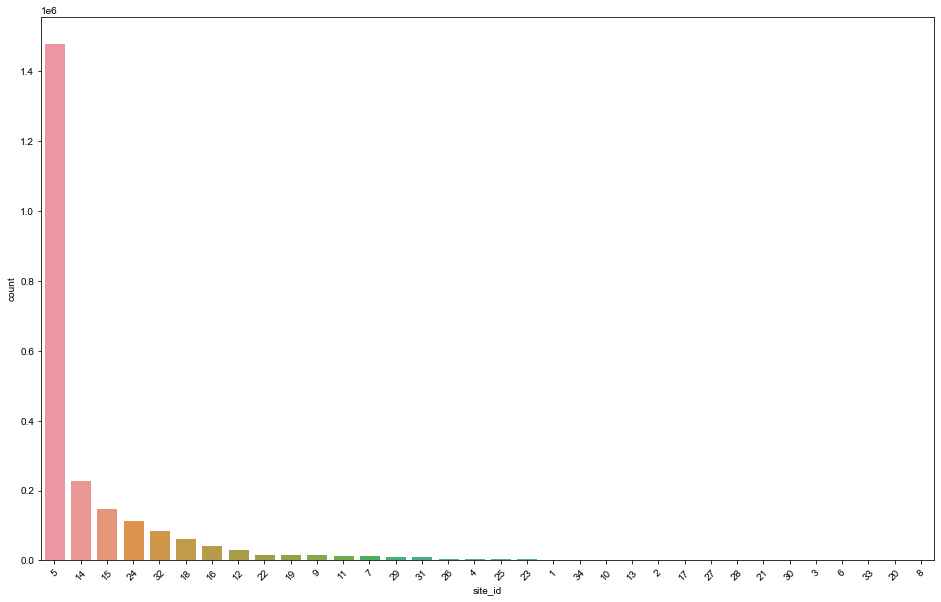

In [14]:
plt.figure(figsize=(16,10))
plt.xticks(rotation=45)
sb.set_style('dark')
print(data['site_id'].value_counts()/len(data)*100)
sb.countplot(x = 'site_id',
              data = data,
              order = data['site_id'].value_counts().index)
plt.show()

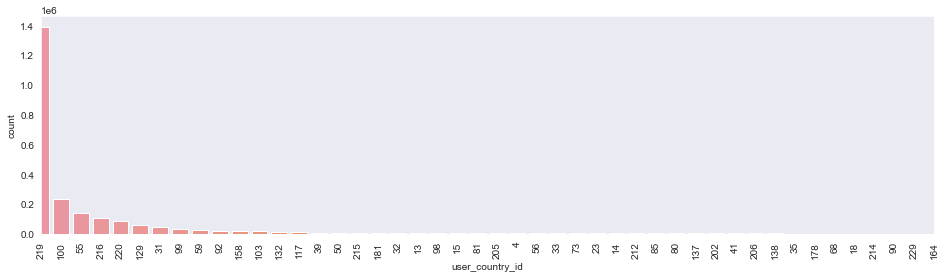

In [15]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
a_plot = sb.countplot(x = 'user_country_id',
              data = data,
              order = data['user_country_id'].value_counts().index)
a_plot.set(xlim=(0, 45))
plt.show()

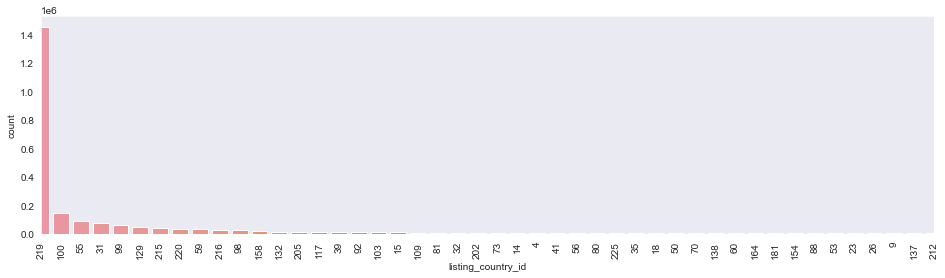

In [16]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
a_plot = sb.countplot(x = 'listing_country_id',
              data = data,
              order = data['listing_country_id'].value_counts().index)
a_plot.set(xlim=(0, 45))
plt.show()

3    39.260140
4    30.664168
2    18.061865
5     8.229965
0     3.433818
1     0.350044
Name: listing_stars, dtype: float64


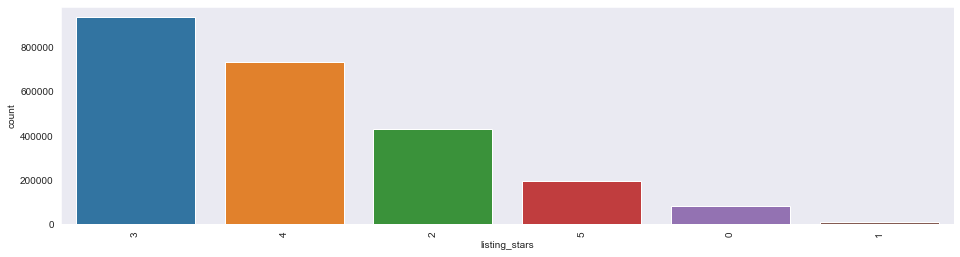

In [17]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
print(data['listing_stars'].value_counts()/len(data)*100)
a_plot = sb.countplot(x = 'listing_stars',
              data = data,
              order = data['listing_stars'].value_counts().index)
plt.show()

#### Listing stars

39.26 percentage have given 3 stars 

30.66 percentage have given 4 stars 

18.06 percentage have given 2 stars 

Only 8.22 percentage have given 5 stars 

4.0    31.399626
4.5    31.243948
3.5    15.459323
3.0     7.575790
5.0     4.790770
0.0     4.695540
2.5     2.889282
2.0     1.234501
1.5     0.292032
1.0     0.272751
Name: listing_review_score, dtype: float64


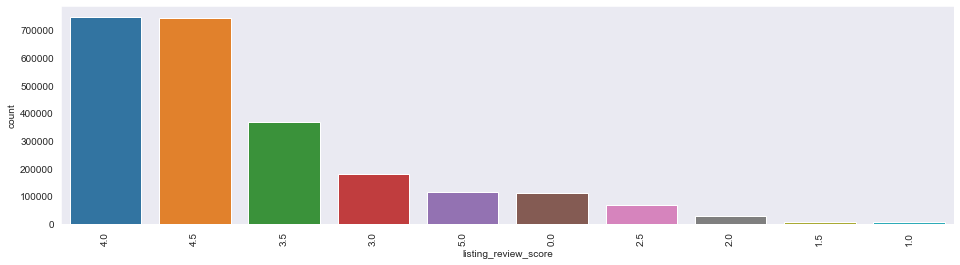

In [18]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
print(data['listing_review_score'].value_counts()/len(data)*100)
a_plot = sb.countplot(x = 'listing_review_score',
              data = data,
              order = data['listing_review_score'].value_counts().index)
plt.show()

#### Review score 
Review score 4.0 given by 31.39 percent
    
Review score 4.5 given by 31.24 percent

Review score 3.5 given by 15.45 percent

Review score 3.0 given by 07.57 percent

Review score 5.0 given by 04.79 percent

Review score 0.0 given by 04.69 percent

Review score 2.5 given by 02.88 percent and so on..

1    63.468802
0    36.531198
Name: is_brand, dtype: float64


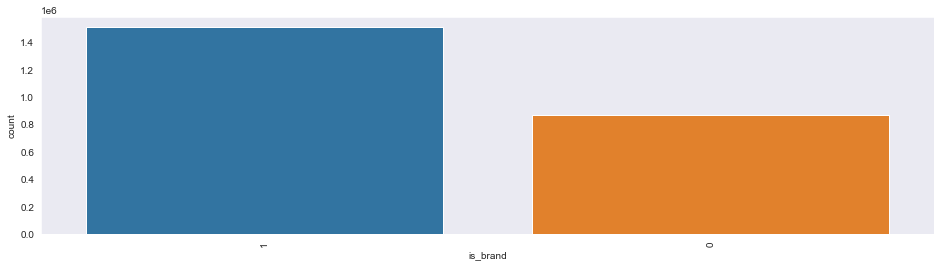

In [19]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
print(data['is_brand'].value_counts()/len(data)*100)
a_plot = sb.countplot(x = 'is_brand',
              data = data,
              order = data['is_brand'].value_counts().index)
plt.show()

### is brand
1 if the hotel is part of a major hotel chain,
0 if it is an independent hotel.

63.46 percent of hotels are of major hotel chain

36.53 percent of hotels are independent hotels

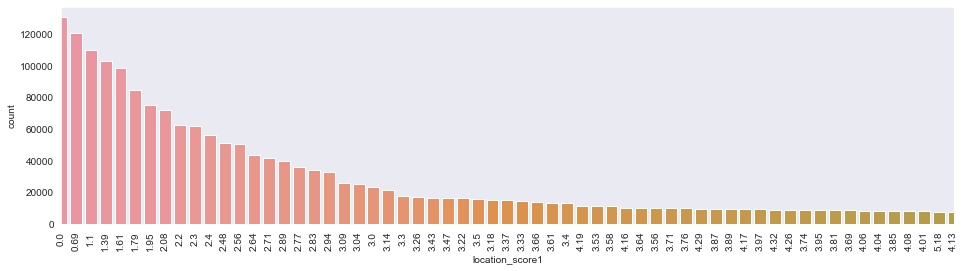

In [20]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
a_plot = sb.countplot(x = 'location_score1',
              data = data,
              order = data['location_score1'].value_counts().index)
a_plot.set(xlim=(0, 60))
plt.show()

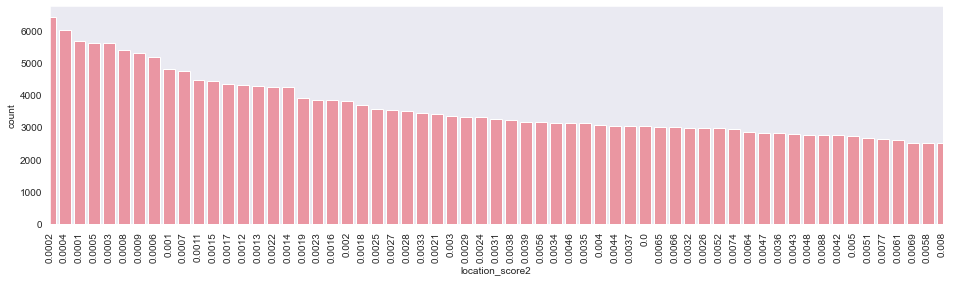

In [21]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
a_plot = sb.countplot(x = 'location_score2',
              data = data,
              order = data['location_score2'].value_counts().index)
a_plot.set(xlim=(0, 60))
plt.show()

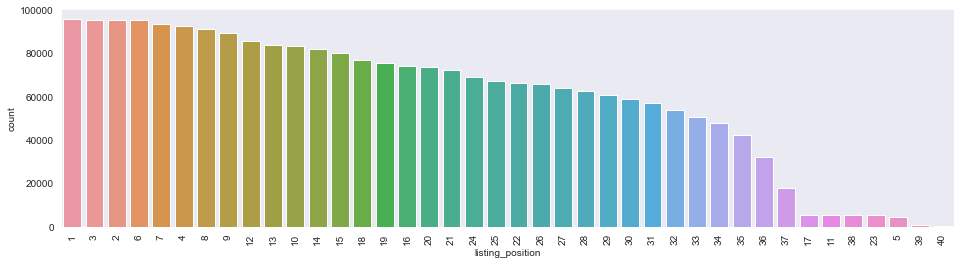

In [22]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')

a_plot = sb.countplot(x = 'listing_position',
              data = data,
              order = data['listing_position'].value_counts().index)
plt.show()

### listing position
Hotel position on the search results page.

As you can see in the graph as the page increases listing position count decreases

0    1868919
1     511638
Name: has_promotion, dtype: int64
0    78.507635
1    21.492365
Name: has_promotion, dtype: float64


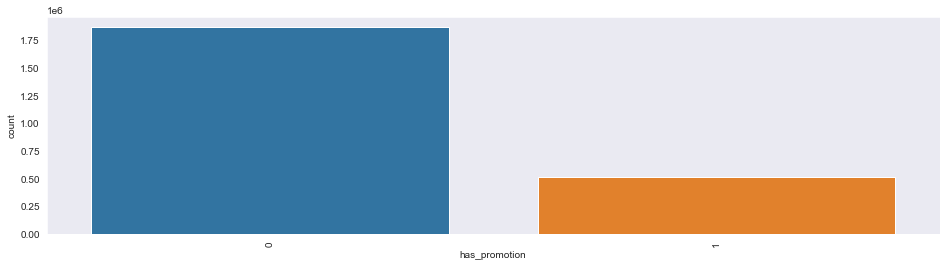

In [23]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['has_promotion'].value_counts())
sb.set_style('dark')
print(data['has_promotion'].value_counts()/len(data)*100)
a_plot = sb.countplot(x = 'has_promotion',
              data = data,
              order = data['has_promotion'].value_counts().index)
plt.show()

### has promotion
1 if the hotel had a sale price promotion specifically displayed

21.49 percent have sale price promotion specifically displayed. Rest of 78.50 percent doesn't have any sale price displayed.

1     43.235134
2     24.008667
3     14.455146
4      7.657074
5      3.799573
7      2.472069
6      2.080858
8      0.678035
9      0.390161
10     0.331897
14     0.264980
11     0.155048
12     0.121232
13     0.087248
15     0.064607
16     0.040747
17     0.026758
21     0.019827
28     0.019785
18     0.017181
20     0.015585
19     0.013106
22     0.009368
27     0.009031
25     0.007897
26     0.005419
24     0.003193
33     0.002646
23     0.002604
30     0.001974
29     0.001554
31     0.001302
57     0.000294
Name: length_of_stay, dtype: float64


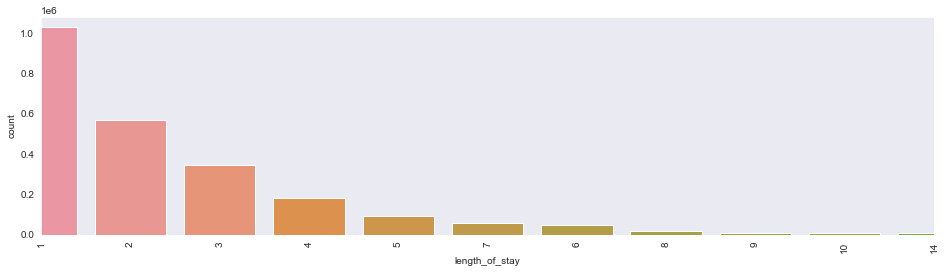

In [24]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['length_of_stay'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'length_of_stay',
              data = data,
              order = data['length_of_stay'].value_counts().index)
a_plot.set(xlim=(0,10))
plt.show()

### length of stay
Number of nights stay that was searched

43.23 percent have searched for 1 night stay

24.00 percent have searched for 2 nights stay

14.45 percent have searched for 3 nights stay as so as shown in the graph

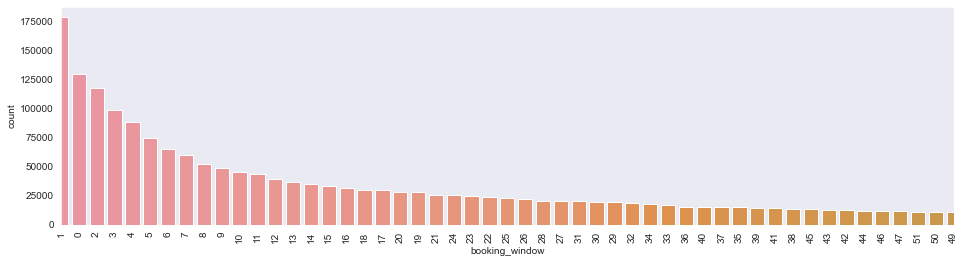

In [67]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
a_plot = sb.countplot(x = 'booking_window',
              data = data,
              order = data['booking_window'].value_counts().index)
a_plot.set(xlim=(0,50))
plt.show()

2    65.348278
1    23.527603
4     4.883185
3     4.755694
6     0.603598
5     0.545839
8     0.207893
7     0.100733
9     0.027179
Name: num_adults, dtype: float64


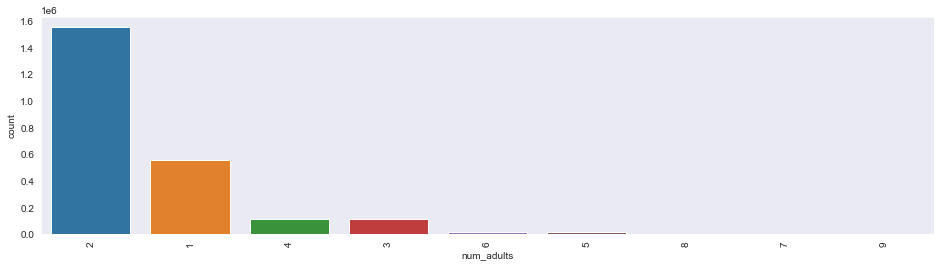

In [26]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['num_adults'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'num_adults',
              data = data,
              order = data['num_adults'].value_counts().index)
plt.show()

### nuber of adults
The number of adults specified in the hotel room

65.34 percent have specified 2 adults

23.52 percent have specified 1 adults

04.88 percent have specified 4 adults

04.75 percent have specified 3 adults

0    76.837228
1    13.761863
2     7.739155
3     1.172793
4     0.373736
5     0.056961
6     0.039235
7     0.011930
8     0.006511
9     0.000588
Name: num_kids, dtype: float64


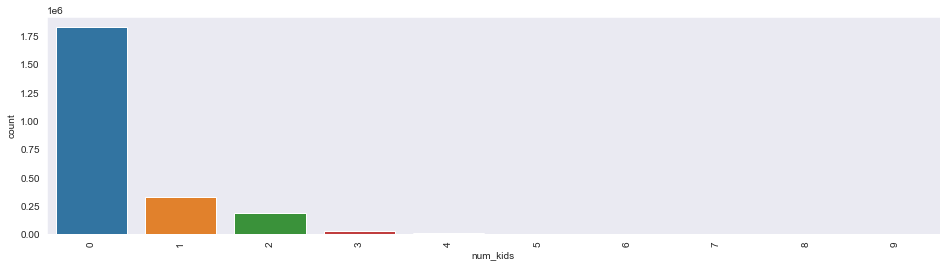

In [27]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['num_kids'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'num_kids',
              data = data,
              order = data['num_kids'].value_counts().index)
plt.show()

### number of kids

The number of (extra occupancy) children specified in the hotel room

0    76.83% have 0 kids specified in the hotel room

1    13.76% have 1 kid  specified in the hotel room

2     7.73% have 2 kids specified in the hotel room ans so on grapgh explains the rest.

1    91.190843
2     7.470983
3     0.878618
4     0.262250
5     0.082124
6     0.045200
8     0.042427
7     0.027557
Name: num_rooms, dtype: float64


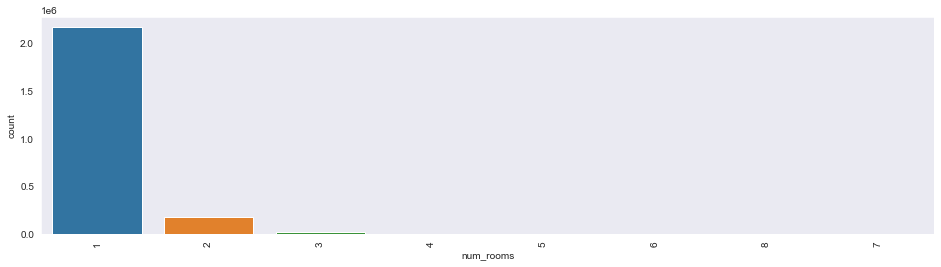

In [28]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['num_rooms'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'num_rooms',
              data = data,
              order = data['num_rooms'].value_counts().index)
plt.show()

### number of rooms

Number of hotel rooms specified in the search

    91.19% have 1 room specified in the search

     7.47% have 2 room specified in the search

     0.87% have 3 room specified in the search

0    50.173384
1    49.826616
Name: stay_on_saturday, dtype: float64


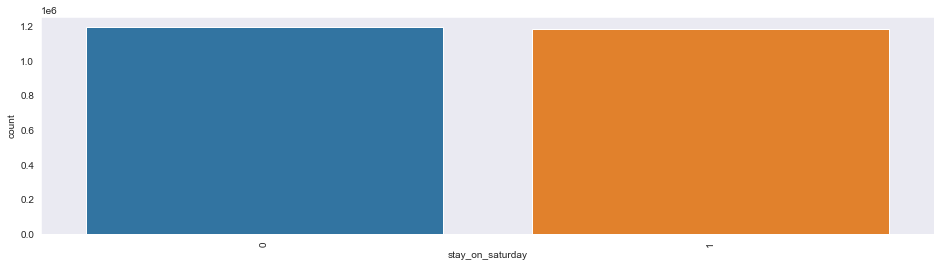

In [29]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['stay_on_saturday'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'stay_on_saturday',
              data = data,
              order = data['stay_on_saturday'].value_counts().index)
plt.show()

### stay on saturday

1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0

    50.17% have not included sat night stay
    49.82% have included sat night stay

0    70.326314
1    29.673686
Name: random_sort, dtype: float64


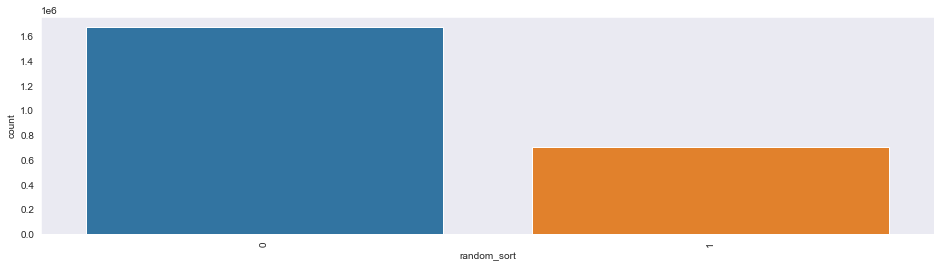

In [30]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['random_sort'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'random_sort',
              data = data,
              order = data['random_sort'].value_counts().index)
plt.show()

### random sort

1 when the displayed sort was random, 0 when the normal sort order was displayed.

70.32% normal sort order was displayed

29.67% sort order was random

0    95.543312
1     4.456688
Name: clicked, dtype: float64


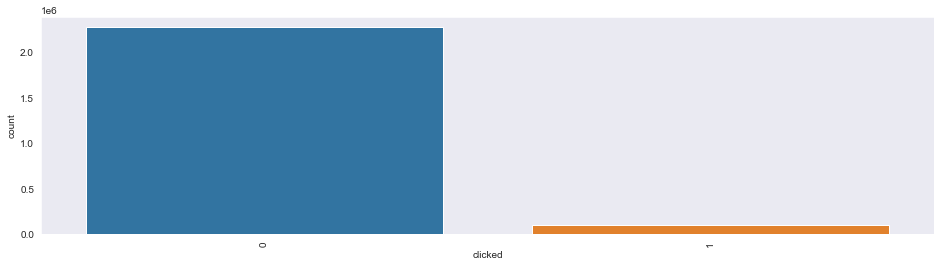

In [31]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['clicked'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'clicked',
              data = data,
              order = data['clicked'].value_counts().index)
plt.show()

0    97.211241
1     2.788759
Name: booked, dtype: float64


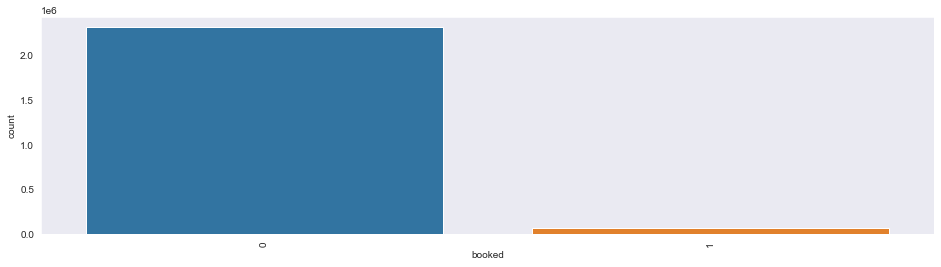

In [32]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
print(data['booked'].value_counts()/len(data)*100)
sb.set_style('dark')
a_plot = sb.countplot(x = 'booked',
              data = data,
              order = data['booked'].value_counts().index)
plt.show()

# Data Preprocessing


#### Listing out all the columns with percentage of null value


In [33]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

search_id                          0.000000
timestamp                          0.000000
site_id                            0.000000
user_country_id                    0.000000
user_hist_stars                   94.842384
user_hist_paid                    94.812391
listing_country_id                 0.000000
listing_id                         0.000000
listing_stars                      0.000000
listing_review_score               0.146436
is_brand                           0.000000
location_score1                    0.000000
location_score2                   22.095333
log_historical_price               0.000000
listing_position                   0.000000
price_usd                          0.000000
has_promotion                      0.000000
destination_id                     0.000000
length_of_stay                     0.000000
booking_window                     0.000000
num_adults                         0.000000
num_kids                           0.000000
num_rooms                       

In [34]:
#dropping columns which has higher number of null values

datafin=data.drop(['search_id', 'site_id', 'user_country_id', 'listing_country_id','listing_id','timestamp',
                   'user_hist_stars', 'user_hist_paid', 'log_click_proportion', 'booking_value',
                   'competitor1_rate', 'competitor1_has_availability', 'competitor1_price_percent_diff',
                   'competitor2_rate', 'competitor2_has_availability', 'competitor2_price_percent_diff', 
                   'competitor3_rate', 'competitor3_has_availability', 'competitor3_price_percent_diff', 
                   'competitor4_rate', 'competitor4_has_availability', 'competitor4_price_percent_diff', 
                   'competitor5_rate', 'competitor5_has_availability', 'competitor5_price_percent_diff', 
                   'competitor6_rate', 'competitor6_has_availability', 'competitor6_price_percent_diff', 
                   'competitor7_rate', 'competitor7_has_availability', 'competitor7_price_percent_diff', 
                   'competitor8_rate', 'competitor8_has_availability', 'competitor8_price_percent_diff',],axis=1)
datafin

#data after dropping columns

,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked
0,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,238.35,1,0,0
1,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,238.34,1,0,0
2,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,238.33,1,0,0
3,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,238.29,1,0,0
4,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,238.35,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,4,4.5,1,2.94,0.1153,5.91,15,259.0,1,7037,1,3,2,2,1,0,2563.84,1,0,0
2380553,4,4.5,1,3.09,0.0304,6.21,8,349.0,0,7037,1,3,2,2,1,0,2558.31,1,0,0
2380554,5,4.5,1,2.56,0.0483,6.21,16,429.0,0,7037,1,3,2,2,1,0,2560.30,1,0,0
2380555,3,4.0,1,3.33,0.0410,5.63,6,175.0,1,7037,1,3,2,2,1,0,2557.77,1,0,0


In [35]:
percent_missing1 = datafin.isnull().sum() * 100 / len(data)
percent_missing1

listing_stars            0.000000
listing_review_score     0.146436
is_brand                 0.000000
location_score1          0.000000
location_score2         22.095333
log_historical_price     0.000000
listing_position         0.000000
price_usd                0.000000
has_promotion            0.000000
destination_id           0.000000
length_of_stay           0.000000
booking_window           0.000000
num_adults               0.000000
num_kids                 0.000000
num_rooms                0.000000
stay_on_saturday         0.000000
distance_to_dest        32.359486
random_sort              0.000000
clicked                  0.000000
booked                   0.000000
dtype: float64

In [36]:
#Filling the null values with mode and 0 of that column

datafin['listing_review_score'] = datafin['listing_review_score'].fillna(datafin['listing_review_score'].mode()[0])
datafin['location_score2'] = datafin['location_score2'].fillna(datafin['location_score2'].mode()[0])
datafin['distance_to_dest'] = datafin['distance_to_dest'].fillna(datafin['distance_to_dest'].mode()[0])

In [37]:
# checking for null value 

datafin.isnull().sum().any()

False

In [38]:
#to find the pairwise correlation of all columns in the dataset

datafin.corr()

,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,distance_to_dest,random_sort,clicked,booked
listing_stars,1.000000,0.304300,0.021530,0.286722,0.119782,0.167386,-0.106520,0.008934,0.173341,-0.005160,0.089774,0.074635,0.008277,-0.031002,0.038510,-0.041229,0.097377,-0.009450,0.031012,0.022089
listing_review_score,0.304300,1.000000,0.202269,0.110605,0.115041,0.119348,-0.054289,0.001273,0.057312,-0.007331,-0.019675,0.008365,0.022169,0.018219,0.017817,0.020676,-0.012457,-0.051458,0.024075,0.025665
is_brand,0.021530,0.202269,1.000000,-0.189140,-0.067039,-0.001951,0.022010,-0.000711,-0.117088,-0.026555,-0.106472,-0.094593,0.008796,0.040364,0.021403,0.073669,-0.105390,-0.043400,0.001456,0.009751
location_score1,0.286722,0.110605,-0.189140,1.000000,0.431801,0.116717,0.004713,0.004451,0.180371,-0.008894,0.120475,0.121829,0.022383,-0.019334,0.025660,-0.052708,0.124335,0.001201,0.002346,-0.003360
location_score2,0.119782,0.115041,-0.067039,0.431801,1.000000,0.066230,-0.190619,0.000663,0.075865,0.030409,0.027122,0.048925,0.013846,-0.030814,-0.003601,-0.015344,0.041727,-0.005578,0.083375,0.075861
log_historical_price,0.167386,0.119348,-0.001951,0.116717,0.066230,1.000000,-0.009588,-0.001985,0.037340,-0.005097,0.032306,0.080318,-0.008923,-0.040605,0.005704,0.000792,0.038917,0.005786,0.003157,-0.000224
listing_position,-0.106520,-0.054289,0.022010,0.004713,-0.190619,-0.009588,1.000000,-0.002925,-0.103385,-0.003983,-0.006109,-0.007411,-0.007283,-0.021252,-0.024477,-0.004089,0.002952,-0.014365,-0.165024,-0.148420
price_usd,0.008934,0.001273,-0.000711,0.004451,0.000663,-0.001985,-0.002925,1.000000,0.002219,0.001662,0.000787,-0.001405,0.002105,0.001291,-0.000804,-0.002953,-0.001891,-0.001089,0.000171,-0.000026
has_promotion,0.173341,0.057312,-0.117088,0.180371,0.075865,0.037340,-0.103385,0.002219,1.000000,-0.004577,0.115493,0.027547,0.016371,-0.005827,0.011212,-0.044217,0.053761,-0.023006,0.040241,0.036804
destination_id,-0.005160,-0.007331,-0.026555,-0.008894,0.030409,-0.005097,-0.003983,0.001662,-0.004577,1.000000,-0.001079,0.000963,-0.000336,-0.003646,-0.001713,0.001172,0.008030,-0.000157,0.000969,0.000327


<AxesSubplot:>

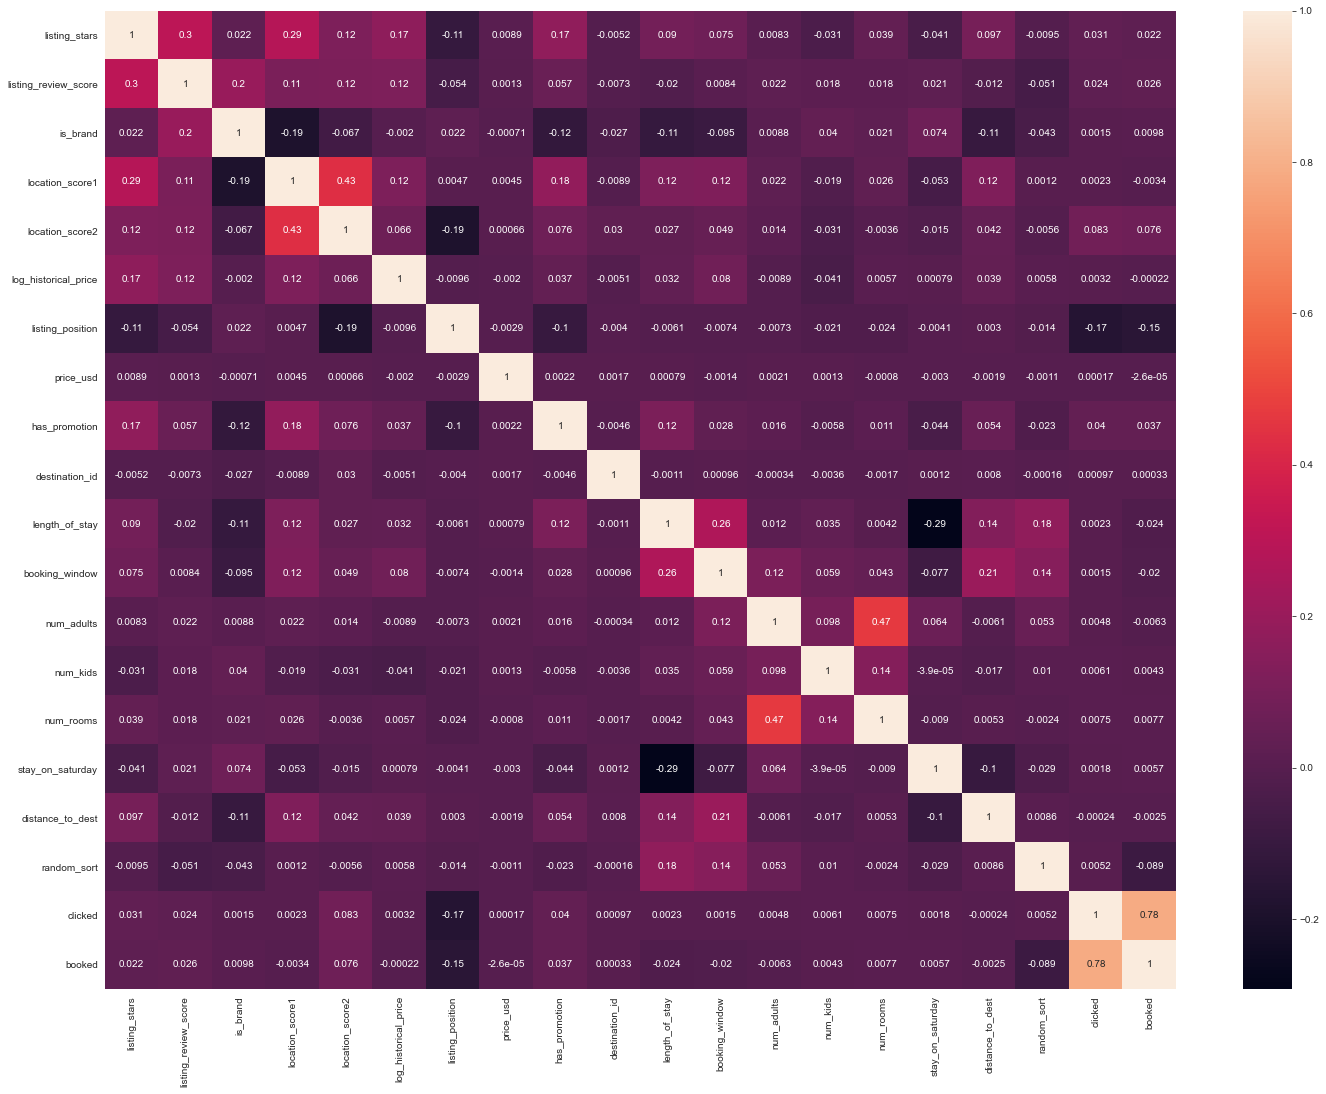

In [39]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(24,18))
sb.heatmap(datafin.corr(),annot= True)

#### Assigning Independent and Dependent Variables Here x is considered as Independent variable y is Dependent Variables

In [40]:
x=datafin.drop(['booked'],axis=1)
y=datafin['booked']

#### We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set



In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

## Calculate Conversion Rates

In [42]:
# working on linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [43]:
metrics.r2_score(y_test, pred)

0.6244096317441972

In [44]:
lr.score(x_test, y_test)

0.6244096317441972

# Model Building


In [45]:
model=[RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),KNeighborsClassifier()]

In [46]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print ('Accuracy score:')
    print (accuracy_score(y_test,pred.round())*100)
    print ('Confusion Matrix:')
    print (confusion_matrix(y_test,pred.round()))
    print ('Classification Matrix:')
    print (classification_report(y_test,pred.round()))

Accuracy score:
99.39005948180261
Confusion Matrix:
[[575848   2647]
 [   983  15662]]
Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    578495
           1       0.86      0.94      0.90     16645

    accuracy                           0.99    595140
   macro avg       0.93      0.97      0.95    595140
weighted avg       0.99      0.99      0.99    595140

Accuracy score:
98.94646637765904
Confusion Matrix:
[[575527   2968]
 [  3302  13343]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    578495
           1       0.82      0.80      0.81     16645

    accuracy                           0.99    595140
   macro avg       0.91      0.90      0.90    595140
weighted avg       0.99      0.99      0.99    595140

Accuracy score:
99.38787512182007
Confusion Matrix:
[[575782   2713]
 [   930  15715]]
Classification Matrix:
              pr

## MODELS AND ACCURACY SCORE:

RandomForestClassifier()............Accuracy score: 99.3908

DecisionTreeClassifier()............Accuracy score: 98.9499
    
GradientBoostingClassifier()........Accuracy score: 99.3878

KNeighborsClassifier()..............Accuracy score: 97.1858

## Calculate Click-Through Rates 

In [47]:
#used to view some basic statistical details like percentile, mean, std and so on of clicked column

data['clicked'].describe()

count    2.380557e+06
mean     4.456688e-02
std      2.063509e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: clicked, dtype: float64

In [48]:
data['clicked'].value_counts()/len(data)*100

0    95.543312
1     4.456688
Name: clicked, dtype: float64

### Click through rate is approximately 4.4% clicked, and approximately 95.5% is not clicked.

In [49]:
data.timestamp.describe()

count                 2380557
unique                  95578
top       2013-01-13 19:26:30
freq                       84
Name: timestamp, dtype: object

In [50]:
#setting type of datetime

date = data["timestamp"].values.astype('datetime64[D]')

In [51]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [52]:
#formatting datetime 

data["timestamp"] = pd.to_datetime(data["timestamp"],format="%y-%m-%d %H:%M:%S")

In [53]:
#attribute to return the hour of the datetime in the underlying data of the given Series object

data["timestamp"].dt.hour

0           8
1           8
2           8
3           8
4           8
           ..
2380552    16
2380553    16
2380554    16
2380555    16
2380556    16
Name: timestamp, Length: 2380557, dtype: int64

In [54]:
data["actual_hour_day"]= data["timestamp"].dt.hour

In [55]:
#grouping actual hour per day with clicked 

imp= data.groupby(['actual_hour_day', 'clicked']).size().unstack()

In [56]:
imp.head()

clicked,0,1
actual_hour_day,,
0,34902,1765
1,22857,1167
2,15422,758
3,14757,696
4,21500,997


[]

<Figure size 432x288 with 0 Axes>

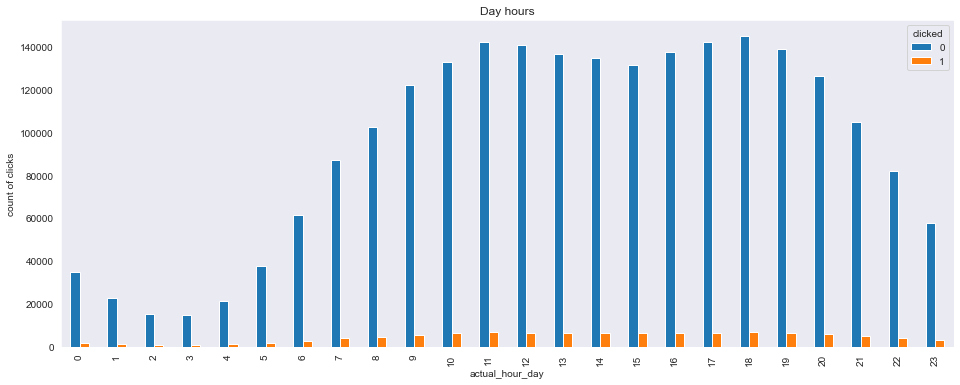

In [57]:
plt.figure()
imp.plot(kind='bar', title="Day hours", figsize=(16,6))
plt.ylabel("count of clicks")
plt.plot()


### property star rating affect click-through

<AxesSubplot:xlabel='listing_stars'>

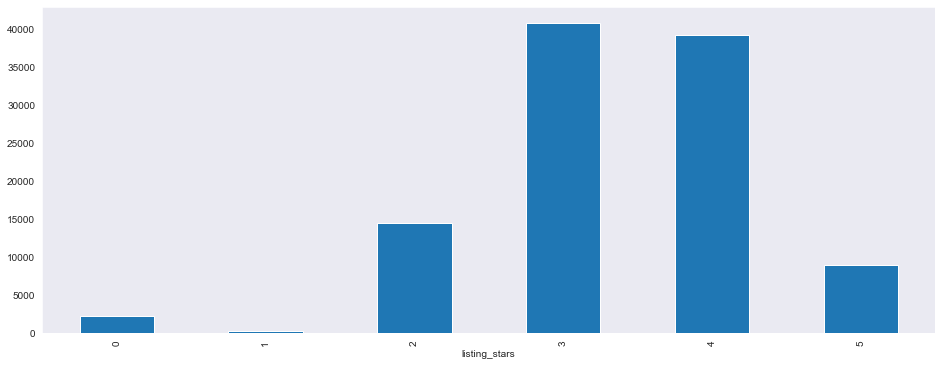

In [63]:
data.groupby('listing_stars')['clicked'].sum().plot(kind='bar',figsize=(16,6))

### property review score affect click-through

<AxesSubplot:xlabel='listing_review_score'>

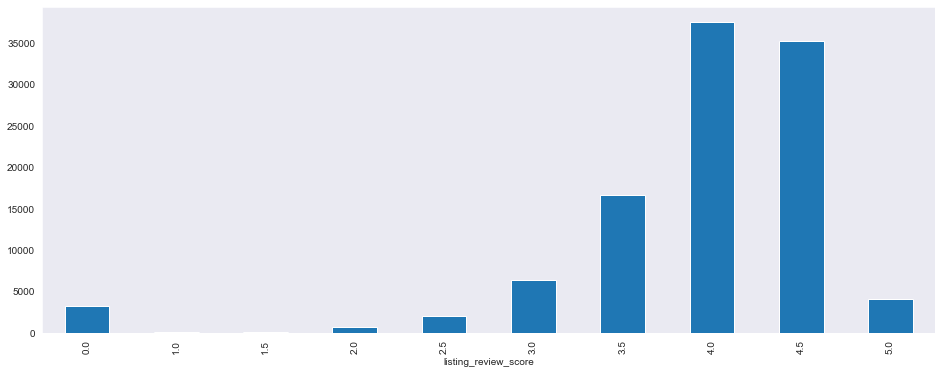

In [64]:
data.groupby('listing_review_score')['clicked'].sum().plot(kind='bar',figsize=(16,6))

# Question 3


#### Which outcome variable did you choose and why? 

Ans: I chose booked as outcome variable, where booked will be the final stage in hotel search.

#### Which variables did you include in the initial model? 


Ans: I have included clicked variable in the initial model

#### Which transformations/pre-processes did you apply? Why did you apply those transformations? What would have happened if you didn't apply those techniques? 

Ans: 1. In the pre-processing i found the percentage of null values in each column 
    
     2. Removed all the columns which have null value percentage more than 35%
        
     3. filled null values using fiilna and mode for columns which have null percentage below 35%   

#### Which machine learning technique did you choose? Why?


Ans: I chose these 4 models 
    
     1. RandomForestClassifier()

     2. DecisionTreeClassifier()

     3. GradientBoostingClassifier()
    
     4. KNeighborsClassifier()
        
        And i considered randomforestclassifier because it gave out the best accuracy.

#### Which evaluation metric did you use to optimize the machine learning model? 

Ans: I used accuracy metric to optimize the machine learning model

#### How would you interpret this model? If the model is too complex to be directly interpreted, how would you approach this problem?  

#### Model Interpretation with ELI5

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions in an easy to 
understand an intuitive way. 

It is perhaps the easiest of the three machine learning frameworks to get started with since it involves minimal reading 
of documentation! 

However it doesn’t support true model-agnostic interpretations and support for models are mostly limited to tree-based 
and other parametric\linear models. 

Let’s look at some intuitive ways of model interpretation with ELI5 on our classification model.

approaching this problem with these 2 techniques

1. Global Interpretation: Look at a model’s parameters and figure out at a global level how the model works
2. Local Interpretation: Look at a single prediction and identify features leading to that prediction